In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('wholesale_customers_data.csv')
df.sample(n=8)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
295,2,2,7588,1897,5234,417,2208,254
203,1,1,583,685,2216,469,954,18
417,1,3,5065,5499,11055,364,3485,1063
415,2,3,7842,6046,8552,1691,3540,1874
425,1,3,11243,2408,2593,15348,108,1886
247,1,1,13569,346,489,2077,44,659
385,1,3,11635,922,1614,2583,192,1068
153,1,3,3463,9250,2368,779,302,1627


In [3]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
df.shape

(440, 8)

In [5]:
data = df.copy()

for cols in data.columns[2:]:
  Q1 = data[cols].quantile(0.25)
  Q3 = data[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  data.loc[(data[cols] < low) | (data[cols] > high), cols] = data[cols].median()

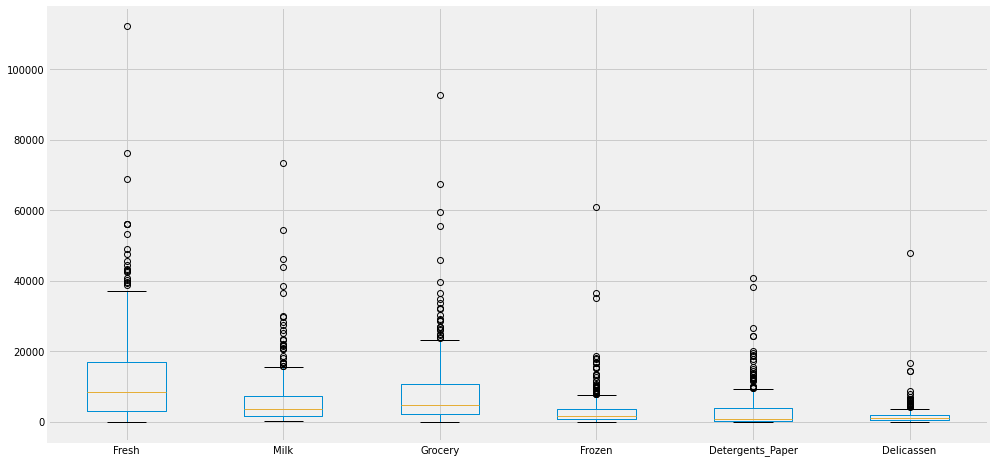

In [6]:
df.iloc[:, 2:].boxplot(figsize=(15,8))

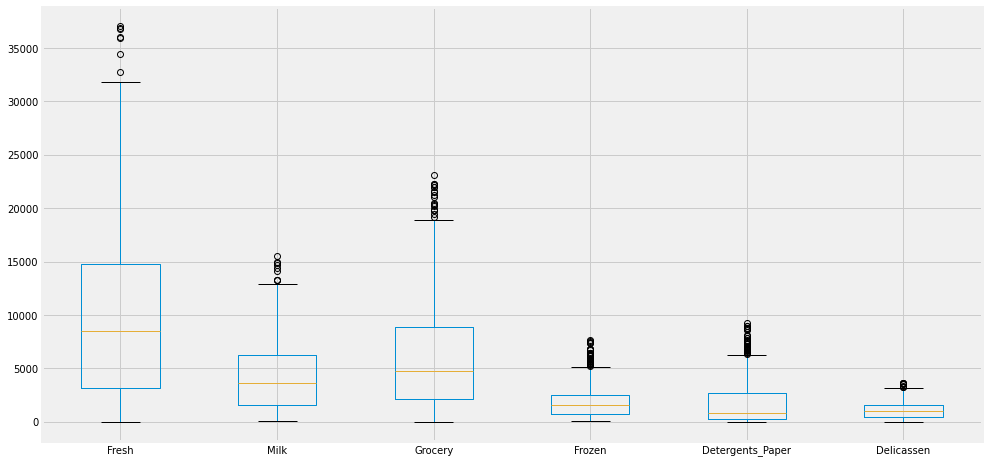

In [7]:
data.iloc[:, 2:].boxplot(figsize=(15,8))

In [8]:
from scipy.stats import zscore


data = data.apply(zscore)
data = pd.DataFrame(data, columns=df.columns)
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.312278,1.581331,0.251637,-1.005765,0.384841,0.302219
1,1.448652,0.590668,-0.352577,1.626645,0.627928,-0.080488,0.659291,0.823978
2,1.448652,0.590668,-0.435980,1.331810,0.274698,0.303849,0.758164,-0.141514
3,-0.690297,0.590668,0.382886,-0.907994,-0.374579,2.694150,-0.575956,0.838273
4,1.448652,0.590668,1.490583,0.331960,0.183578,1.206413,-0.012868,-0.141514


In [9]:
data.shape

(440, 8)

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.8)
y_pred = dbscan.fit_predict(data)

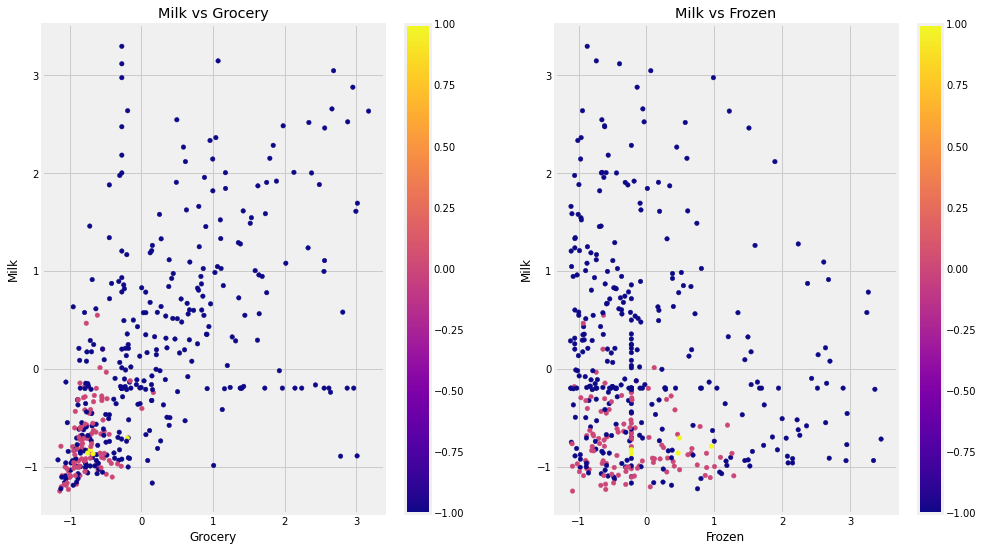

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))
data.plot(
    kind='scatter',
    title='Milk vs Grocery',
    x='Grocery',
    y='Milk',
    c=y_pred,
    s=20,
    ax=axs[0],
    cmap='plasma',
)

data.plot(
    kind='scatter',
    title='Milk vs Frozen',
    x='Frozen',
    y='Milk',
    c=y_pred,
    s=20,
    ax=axs[1],
    cmap='plasma',
)